# Project Title
__Group 28__: Zijian Wan, Zhe Li, John O'Brien, Selin Karabulut

Arizona is a swing state, like the other swing states, has switched between the Republican and Democratic Party from election to election. Turning out to vote and who turns out matter. But what affects voter turnout? Do socieconomic factors such as age, gender, education, ethnicity and household income impact turnout?

In [2]:
# load AZ data
dfaz = spark.read\
.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter", "\t")\
.option("inferSchema", "true")\
.load("gs://pstat135-voter-file/VM2Uniform/VM2Uniform--AZ--2021-05-20.tab")

## Variables of Interest

* ElectionReturns_G08CountyTurnoutAllRegisteredVoters
* ElectionReturns_G10CountyTurnoutAllRegisteredVoters
* ElectionReturns_G12CountyTurnoutAllRegisteredVoters
* ElectionReturns_G14CountyTurnoutAllRegisteredVoters
* ElectionReturns_G16CountyTurnoutAllRegisteredVoters
* ElectionReturns_G18CountyTurnoutAllRegisteredVoters
* CommercialData_EstimatedHHIncome
* CommercialData_EstHomeValue
* Ethnic_Description
* EthnicGroups_EthnicGroup1Desc
* Voters_Age
* Voters_Gender
* CommercialData_Education
* County
* Voters_FIPS


Turnout data is at the county level and socioeconomic indicators are at individual level. As a next step, we will aggregate individual level data up to county level using variables 'County' and 'Voters_FIPS'

In [3]:
# count rows 
dfaz.count()

4266400

In [4]:
#  a list of columns
dfaz.columns

['SEQUENCE',
 'LALVOTERID',
 'Voters_Active',
 'Voters_StateVoterID',
 'Voters_CountyVoterID',
 'VoterTelephones_LandlineAreaCode',
 'VoterTelephones_Landline7Digit',
 'VoterTelephones_LandlineFormatted',
 'VoterTelephones_LandlineUnformatted',
 'VoterTelephones_LandlineConfidenceCode',
 'VoterTelephones_CellPhoneOnly',
 'VoterTelephones_CellPhoneFormatted',
 'VoterTelephones_CellPhoneUnformatted',
 'VoterTelephones_CellConfidenceCode',
 'Voters_FirstName',
 'Voters_MiddleName',
 'Voters_LastName',
 'Voters_NameSuffix',
 'Residence_Addresses_AddressLine',
 'Residence_Addresses_ExtraAddressLine',
 'Residence_Addresses_City',
 'Residence_Addresses_State',
 'Residence_Addresses_Zip',
 'Residence_Addresses_ZipPlus4',
 'Residence_Addresses_HouseNumber',
 'Residence_Addresses_PrefixDirection',
 'Residence_Addresses_StreetName',
 'Residence_Addresses_Designator',
 'Residence_Addresses_SuffixDirection',
 'Residence_Addresses_ApartmentNum',
 'Residence_Addresses_ApartmentType',
 'Residence_Addr

In [5]:
# inspect a column 'ElectionReturns_G08CountyTurnoutAllRegisteredVoters'
dfaz.describe(["ElectionReturns_G08CountyTurnoutAllRegisteredVoters"]).show()

+-------+---------------------------------------------------+
|summary|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|
+-------+---------------------------------------------------+
|  count|                                            4266400|
|   mean|                                               null|
| stddev|                                               null|
|    min|                                                53%|
|    max|                                                76%|
+-------+---------------------------------------------------+



In [6]:
# to check missingness and how many
dfaz.where(dfaz["ElectionReturns_G08CountyTurnoutAllRegisteredVoters"].isNull()).count()

0

In [7]:
# inspect a column 'CommercialData_EstimatedHHIncome'
dfaz.describe(["CommercialData_EstimatedHHIncome"]).show()

+-------+--------------------------------+
|summary|CommercialData_EstimatedHHIncome|
+-------+--------------------------------+
|  count|                         4094069|
|   mean|                            null|
| stddev|                            null|
|    min|                     $1000-14999|
|    max|                    $75000-99999|
+-------+--------------------------------+



In [8]:
# to check missingness and how many
dfaz.where(dfaz["CommercialData_EstimatedHHIncome"].isNull()).count()

172331

In [9]:
# get the unique categories in the "CommercialData_EstimatedHHIncome" column
dfaz.groupby(["CommercialData_EstimatedHHIncome"]).count().show()

+--------------------------------+-------+
|CommercialData_EstimatedHHIncome|  count|
+--------------------------------+-------+
|                  $175000-199999| 121465|
|                        $250000+| 145239|
|                     $1000-14999|  97947|
|                  $100000-124999| 473065|
|                    $75000-99999| 804277|
|                            null| 172331|
|                  $125000-149999| 321756|
|                    $25000-34999| 219944|
|                  $200000-249999| 105426|
|                    $50000-74999|1049164|
|                  $150000-174999| 145950|
|                    $35000-49999| 486644|
|                    $15000-24999| 123192|
+--------------------------------+-------+



In [10]:
# replace null values in the "CommercialData_EstimatedHHIncome" column with the string "unknown"
dfaz = dfaz.na.fill("unknown", subset=["CommercialData_EstimatedHHIncome"])

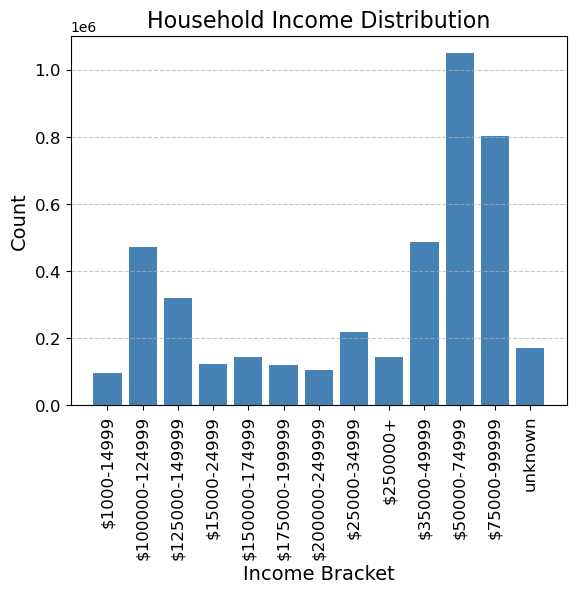

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
# convert the PySpark DataFrame to a Pandas DataFrame
dfazi_pd = dfaz.select("CommercialData_EstimatedHHIncome").toPandas()

# group by income bracket and get the count of each group
grouped = dfazi_pd.groupby("CommercialData_EstimatedHHIncome").size().reset_index(name='count')

# sort the groups by income bracket
grouped = grouped.sort_values("CommercialData_EstimatedHHIncome")

# set the color of the bars
bar_color = "steelblue"

# create a bar plot of the income brackets and their counts
plt.bar(grouped["CommercialData_EstimatedHHIncome"], grouped["count"], color=bar_color)

# add a title and labels to the plot
plt.title("Household Income Distribution", fontsize=16)
plt.xlabel("Income Bracket", fontsize=14)
plt.ylabel("Count", fontsize=14)

# adjust the font size of the axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# add a grid to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add a background color to the plot
plt.rcParams['axes.facecolor'] = '#f2f2f2'

# increase the size of the plot
plt.rcParams['figure.figsize'] = [12, 6]

# show the plot
plt.show()

In [13]:
# inspect a column 'CommercialData_EstHomeValue'
dfaz.describe(["CommercialData_EstHomeValue"]).show()

+-------+---------------------------+
|summary|CommercialData_EstHomeValue|
+-------+---------------------------+
|  count|                    4066567|
|   mean|                       null|
| stddev|                       null|
|    min|                    $100000|
|    max|                    $999983|
+-------+---------------------------+



In [14]:
# replace null values in the "CommercialData_EstHomeValue" column with the string "unknown"
dfaz = dfaz.na.fill("unknown", subset=["CommercialData_EstHomeValue"])

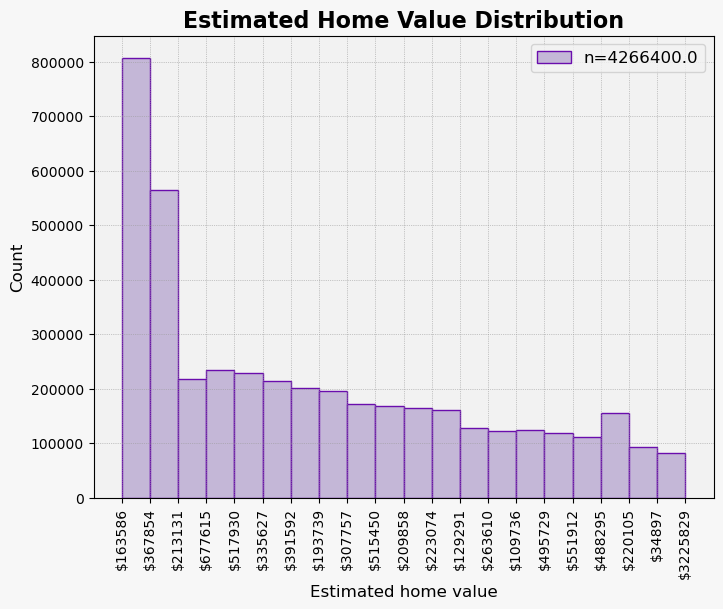

In [15]:
# convert the PySpark DataFrame to a Pandas DataFrame
dfazesth_pd = dfaz.select("CommercialData_EstHomeValue").toPandas()

# set the figure size and background color
fig = plt.figure(figsize=(8, 6), facecolor="#f7f7f7")

# create a histogram of the Voter_Age distribution
n, bins, patches = plt.hist(dfazesth_pd["CommercialData_EstHomeValue"], bins=20, edgecolor="#6a0dad", color="#c4b7d7")

# add a title and labels to the plot
plt.title("Estimated Home Value Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Estimated home value", fontsize=12)
plt.ylabel("Count", fontsize=12)

# customize the x and y ticks
plt.xticks(bins, fontsize=10)
plt.yticks(fontsize=10)

# rotate the x-axis labels to a 90 degree angle
plt.xticks(rotation=90)

# add a grid
plt.grid(linestyle="dotted", linewidth=0.5, color="#999999")

# add a legend
legend_text = f"n={sum(n)}"  # total count of voters
plt.legend([legend_text], fontsize=12, loc="upper right")

# show the plot
plt.show()

In [16]:
# inspect a column 'Ethnic_Description'
dfaz.select(["Ethnic_Description"]).show()

+------------------+
|Ethnic_Description|
+------------------+
|     English/Welsh|
|     English/Welsh|
|     English/Welsh|
|     English/Welsh|
|            Polish|
|              null|
|     English/Welsh|
|            French|
|     English/Welsh|
|              null|
|              null|
|     English/Welsh|
|     English/Welsh|
|     English/Welsh|
|         Slovakian|
|              null|
|              null|
|            French|
|     English/Welsh|
|             Scots|
+------------------+
only showing top 20 rows



In [17]:
# get the unique categories in the "EthnicGroups_EthnicGroup1Desc" column
dfaz.select(["EthnicGroups_EthnicGroup1Desc"]).distinct().show()

+-----------------------------+
|EthnicGroups_EthnicGroup1Desc|
+-----------------------------+
|         East and South Asian|
|                     European|
|                         null|
|                        Other|
|         Likely African-Am...|
|         Hispanic and Port...|
+-----------------------------+



In [18]:
# inspect a column 'Voters_Age'
dfaz.describe(["Voters_Age"]).show()

+-------+------------------+
|summary|        Voters_Age|
+-------+------------------+
|  count|           4263282|
|   mean|50.750146952512175|
| stddev|19.252107428381976|
|    min|                18|
|    max|                99|
+-------+------------------+



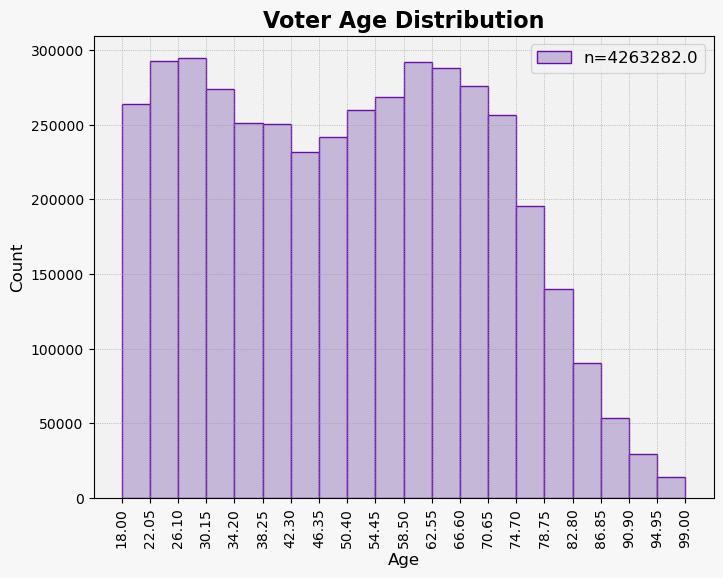

In [19]:
# convert the PySpark DataFrame to a Pandas DataFrame
dfaz_pd = dfaz.select("Voters_Age").toPandas()

# set the figure size and background color
fig = plt.figure(figsize=(8, 6), facecolor="#f7f7f7")

# create a histogram of the Voter_Age distribution
n, bins, patches = plt.hist(dfaz_pd["Voters_Age"], bins=20, edgecolor="#6a0dad", color="#c4b7d7")

# add a title and labels to the plot
plt.title("Voter Age Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)

# customize the x and y ticks
plt.xticks(bins, fontsize=10)
plt.yticks(fontsize=10)

# rotate the x-axis labels to a 90 degree angle
plt.xticks(rotation=90)

# add a grid
plt.grid(linestyle="dotted", linewidth=0.5, color="#999999")

# add a legend
legend_text = f"n={sum(n)}"  # total count of voters
plt.legend([legend_text], fontsize=12, loc="upper right")

# show the plot
plt.show()

In [20]:
# inspect a column 'Voters_Gender'
dfaz.describe(["Voters_Gender"]).show()

+-------+-------------+
|summary|Voters_Gender|
+-------+-------------+
|  count|      4243581|
|   mean|         null|
| stddev|         null|
|    min|            F|
|    max|            M|
+-------+-------------+



In [21]:
# replace null values in the "Voters_Gender" column with the string "unknown"
dfaz = dfaz.na.fill("unknown", subset=["Voters_Gender"])


In [22]:
gaz_counts = dfaz.groupBy("Voters_Gender").count()
gaz_counts.show()

+-------------+-------+
|Voters_Gender|  count|
+-------------+-------+
|            F|2199156|
|      unknown|  22819|
|            M|2044425|
+-------------+-------+



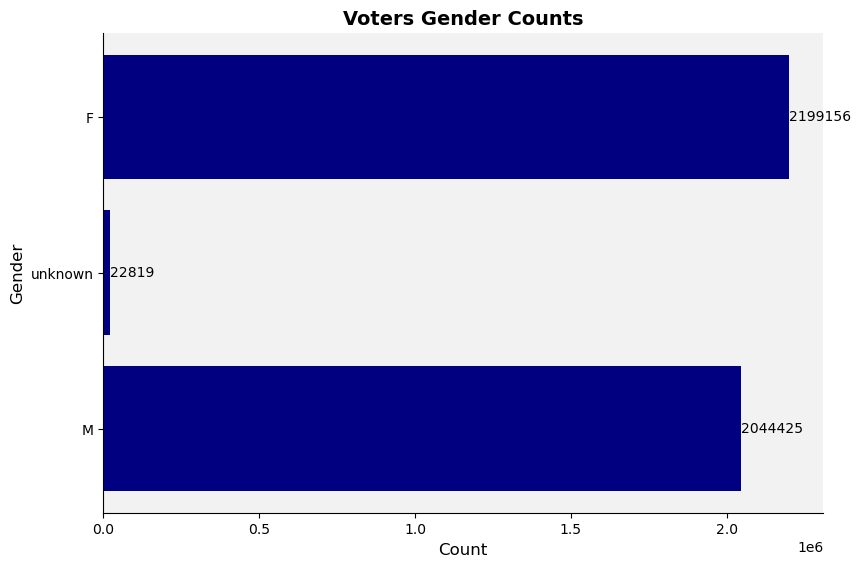

In [23]:
#plot gender
# convert the PySpark DataFrame to a Pandas DataFrame
gaz_counts_pd = gaz_counts.toPandas()

# create a horizontal bar plot of the category counts
plt.barh(gaz_counts_pd["Voters_Gender"], gaz_counts_pd["count"], color="navy")

# add a title and labels to the plot
plt.title("Voters Gender Counts", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Gender", fontsize=12)

# invert the y-axis to show categories in descending order
plt.gca().invert_yaxis()

# remove the top and right spines of the plot
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# add text labels for the counts on each bar
for i, count in enumerate(gaz_counts_pd["count"]):
    plt.text(count+10, i, str(count), va="center", fontsize=10)

# adjust the spacing between the bars and the y-axis labels
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

# show the plot
plt.show()

In [24]:
# inspect a column 'CommercialData_Education'
dfaz.describe(["CommercialData_Education"]).show()

+-------+------------------------+
|summary|CommercialData_Education|
+-------+------------------------+
|  count|                 2282066|
|   mean|                    null|
| stddev|                    null|
|    min|    Bach Degree - Ext...|
|    max|    Vocational Techni...|
+-------+------------------------+



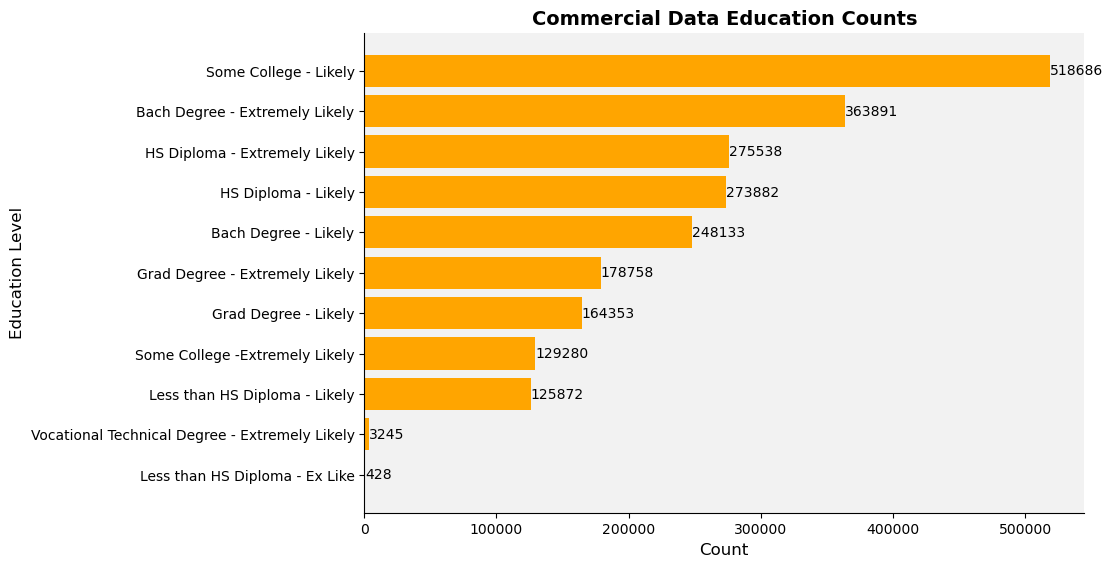

In [25]:
# convert the PySpark DataFrame to a Pandas DataFrame
dfazed_pd = dfaz.select("CommercialData_Education").toPandas()

# count the number of occurrences of each category
category_counts = dfazed_pd["CommercialData_Education"].value_counts()

# import the Matplotlib library for plotting
import matplotlib.pyplot as plt

# create a horizontal bar plot of the category counts
plt.barh(category_counts.index, category_counts.values, color="orange")

# add a title and labels to the plot
plt.title("Commercial Data Education Counts", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Education Level", fontsize=12)

# invert the y-axis to show categories in descending order
plt.gca().invert_yaxis()

# remove the top and right spines of the plot
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# add text labels for the counts on each bar
for i, count in enumerate(category_counts.values):
    plt.text(count+10, i, str(count), va="center", fontsize=10)

# adjust the spacing between the bars and the y-axis labels
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

# show the plot
plt.show()